<a href="https://colab.research.google.com/github/asjadnazir/machine_learning/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
def plot_bar_chart(x_values, y_values, x_label, y_label, title):

    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    plt.bar(x_values, y_values, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability (optional)
    plt.show()

In [19]:
# clms = ['invoice','stockcode','description','length','width','asymmetry','groove','class']
df = pd.read_csv("online_retail.csv")

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
stockcode_by_description = df.groupby('Description')['StockCode'].unique()
duplicate_stockcodes = stockcode_by_description[stockcode_by_description.apply(len) > 1]
print(duplicate_stockcodes)

In [9]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)

In [23]:
df['Description'].fillna('No Description', inplace=True)

In [24]:
df['Customer ID'].fillna(-1, inplace=True)

In [25]:
rows_with_null_stockcode = df[df['StockCode'].isnull()]
print(rows_with_null_stockcode)

       Invoice StockCode     Description  Quantity InvoiceDate  Price  \
577333   54068       NaN  No Description       NaN         NaN    NaN   

        Customer ID Country  
577333         -1.0     NaN  


In [26]:
df.dropna(subset=['StockCode'], inplace=True)

In [27]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [37]:
duplicates = df[df.duplicated()]
print(duplicates)

        Invoice StockCode                        Description  Quantity  \
371      489517     21912           VINTAGE SNAKES & LADDERS       1.0   
383      489517     22130   PARTY CONE CHRISTMAS DECORATION        6.0   
384      489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED      12.0   
385      489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES       1.0   
386      489517     21821   GLITTER STAR GARLAND WITH BELLS        1.0   
...         ...       ...                                ...       ...   
575317  C540535     21232     STRAWBERRY CERAMIC TRINKET BOX      -1.0   
575530   540545     84378      SET OF 3 HEART COOKIE CUTTERS       2.0   
575540   540545     22180                     RETROSPOT LAMP       4.0   
577043   540647     84947  ANTIQUE SILVER TEA GLASS ENGRAVED       6.0   
577096   540647     22624               IVORY KITCHEN SCALES       1.0   

                InvoiceDate  Price  Customer ID         Country  
371     2009-12-01 11:34:00   3.75      16329

In [36]:
num_rows = len(df)
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 577333


In [35]:
num_rows = len(duplicates)
print("Number of rows in the duplicates:", num_rows)

Number of rows in the DataFrame: 36334


In [38]:
df.drop_duplicates(inplace=True)

In [40]:
df['Amount'] = df['Price'] * df['Quantity']

In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime format

# Create new 'Year' and 'Month' columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [43]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12


In [44]:
country_sales = df.groupby('Country')['Amount'].sum().reset_index()

In [45]:
country_sales = country_sales.sort_values(by='Amount', ascending=False)

In [ ]:
print(country_sales)

In [59]:
country_sales = country_sales.head(7)
country_sales.loc[len(country_sales)] = ['Others', country_sales.iloc[7:]['Amount'].sum()]

<ipython-input-59-cb64b797e545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_sales.loc[len(country_sales)] = ['Others', country_sales.iloc[7:]['Amount'].sum()]


In [ ]:
# plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
# plt.bar(country_sales['Country'], country_sales['Amount'], color='skyblue')
# plt.xlabel('Country')
# plt.ylabel('Total Sales')
# plt.title('Country-Wise Sales')
# plt.xticks(rotation=90)
# plt.show()

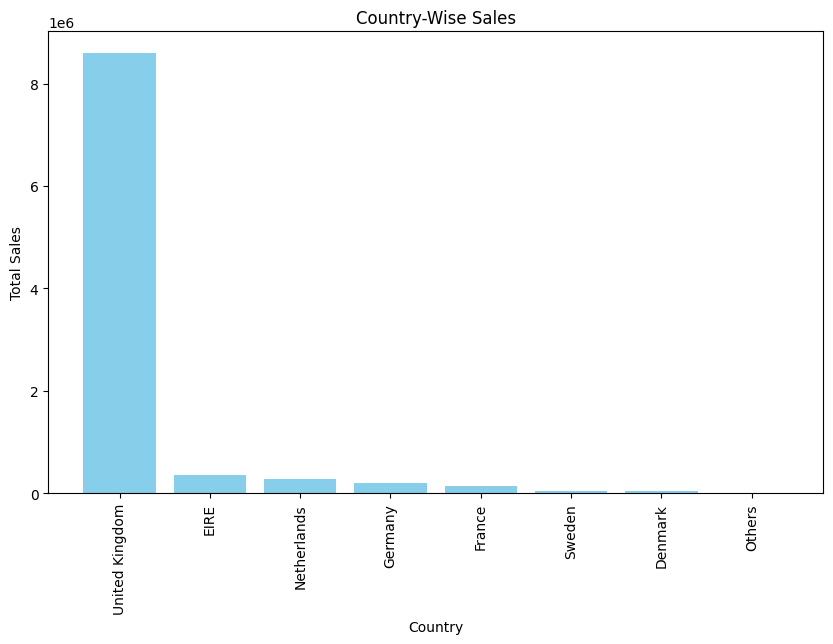

In [72]:
plot_bar_chart(country_sales['Country'], country_sales['Amount'], 'Country', 'Total Sales', 'Country-Wise Sales')